In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
time_start = time.process_time()


#run your code


time_elapsed = (time.process_time()- time_start)
print("Run time: %5.3f s" % time_elapsed)

Run time: 0.000 s


# Convolution

In [3]:
def myconv(list1, list2):
    '''outputs an array with values as far as list2 fits entirely in list1'''
    '''list1 (sample data) must be longer than list2 (convolution data)'''
    convarr = [0]*(len(list1)) # set final array length based on given lists
    i = 0
    for i in range(len(list1)+len(list2)+1):          # sweep through longer list data to store matching index data points into final array
        if i<len(list1):
            j = 0
            for j in range(len(list2)):
                convarr[i] += list1[i-j]*list2[j]
    return convarr

### Checking function validity

In [4]:
lst1 = np.random.randint(0, 10, size = 20)
print(lst1)
lst2 = np.random.randint(0, 10, size = 3)
print(lst2)

[2 2 9 0 5 7 9 4 0 0 3 8 4 8 4 6 5 8 5 0]
[5 6 8]


In [5]:
time_start = time.process_time()

check = np.convolve(lst1, lst2)
print(check)
time_elapsed = (time.process_time()- time_start)
print("Run time: %5.3f s" % time_elapsed)

time_start = time.process_time()

func = myconv(lst1,lst2)
print(func)
time_elapsed = (time.process_time()- time_start)
print("Run time: %5.3f s" % time_elapsed)

[ 10  22  73  70  97  65 127 130  96  32  15  58  92 128 100 118  93 118
 113  94  40   0]
Run time: 0.000 s
[50, 22, 73, 70, 97, 65, 127, 130, 96, 32, 15, 58, 92, 128, 100, 118, 93, 118, 113, 94]
Run time: 0.000 s


### Checking function performance vs np.convolve

In [6]:
lst1 = np.random.randint(0, 10, size = 10000)
print(lst1)
lst2 = np.random.randint(0, 10, size = 50)
print(lst2)

[6 3 2 ... 1 2 1]
[2 4 1 6 4 8 5 5 8 1 6 5 0 0 0 8 2 7 6 6 7 3 5 6 9 5 2 7 3 9 5 0 2 8 7 8 9
 6 6 1 6 0 6 6 2 6 6 2 6 8]


In [7]:
time_start = time.process_time()

check = np.convolve(lst1, lst2)
time_elapsed = (time.process_time()- time_start)
print("Run time: %5.3f s" % time_elapsed)

time_start = time.process_time()

func = myconv(lst1,lst2)
time_elapsed = (time.process_time()- time_start)
print("Run time: %5.3f s" % time_elapsed)

Run time: 0.000 s
Run time: 0.094 s


## Exponential Filters

In [8]:
def loexp(size):
    impres_lopass = [0]*size # define width of the impulse reponse
    
    i = 0
    for i in range(size): # exponential function
        impres_lopass[i] = np.exp(-i)
        
    i = 0
    sumstore = sum(impres_lopass)
    for i in range(size): # normalize impulse response to 1
        impres_lopass[i] = impres_lopass[i]/sumstore

    return impres_lopass

def hiexp(size):
    impres_hipass = [0]*size # define width of the impulse reponse
    
    i = 0
    for i in range(size): # exponential function
        impres_hipass[i] = -np.exp(-i)
    possum = -sum(impres_hipass)
    impres_hipass[0] *= -1 # make first value positive
    
    i = 0
    for i in range(size): # normalize impulse response to 0
        impres_hipass[i] = impres_hipass[i]/possum
    
    impres_hipass[0] = abs(sum(impres_hipass[1:size])) # set total sum of values = 0
    
    return impres_hipass

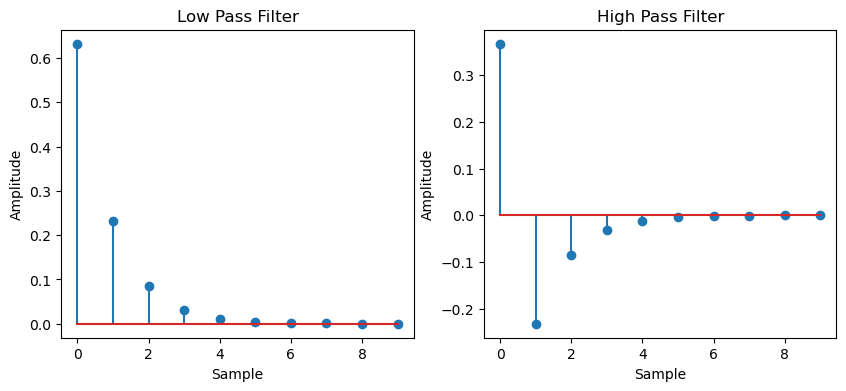

In [9]:
explo_impres = loexp(10)
exphi_impres = hiexp(10)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ax[0].stem(explo_impres)
ax[0].set_title('Low Pass Filter')
ax[1].stem(exphi_impres)
ax[1].set_title('High Pass Filter')

for i in range(len(ax)):
    ax[i].set_xlabel('Sample')
    ax[i].set_ylabel('Amplitude')

## Simple Moving Average Filters

In [10]:
def loMA(size):
    '''size must be an odd integer'''
    impres_lopass = [0]*size # define width of the impulse reponse
    
    i = 0
    for i in range(size):
        impres_lopass[i] = 1/size # gives normalized impulse response values
    return impres_lopass
        
def hiMA(size):
    '''size must be an odd integer'''
    impres_hipass = [0]*size # define width of the impulse reponse
    
    i = 0
    for i in range(size):
        impres_hipass[i] = -1/size
    impres_hipass[size//2] = 1/size * (size-1) # 'normalize' to 0
    return impres_hipass

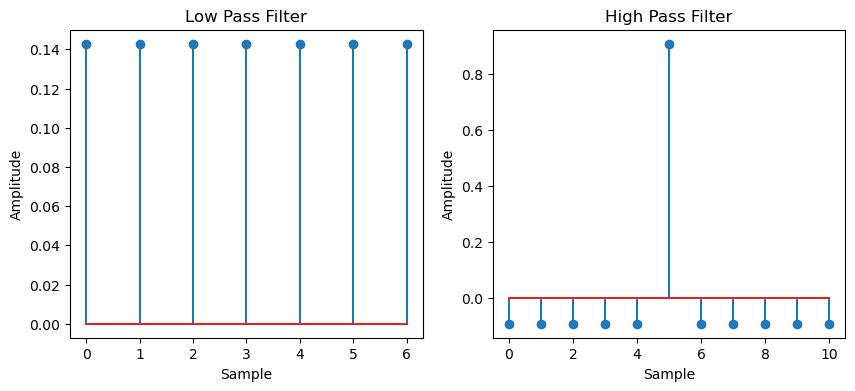

In [11]:
loMA_impres = loMA(7)
hiMA_impres = hiMA(11)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ax[0].stem(loMA_impres)
ax[0].set_title('Low Pass Filter')
ax[1].stem(hiMA_impres)
ax[1].set_title('High Pass Filter')

for i in range(len(ax)):
    ax[i].set_xlabel('Sample')
    ax[i].set_ylabel('Amplitude')

## Sinc Filters

In [12]:
def losinc(size):
    '''size must be an odd integer'''
    impres_lopass = [0]*size # define width of the impulse reponse
    
    i = 0
    for i in range(size): # sinc values inserted, and graph is shifted so that the output is a horizontally symmetrical array
        impres_lopass[i] = np.sinc((i-size//2)/np.pi)
        
    storesum = sum(impres_lopass)
    i = 0
    for i in range(size): # normalize values
        impres_lopass[i] = impres_lopass[i]/storesum
    
    return impres_lopass


def hisinc(size):
    '''size must be an odd integer'''
    impres_hipass = [0]*size # define width of the impulse reponse
    
    i = 0
    tysum=0
    for i in range(size): # sinc values inserted, and graph is shifted so that the output is a horizontally symmetrical array
        impres_hipass[i] = -np.sinc((i-size//2)/np.pi)
    
    storesum = sum(impres_hipass[0:(size//2)])+sum(impres_hipass[(size//2)+1:size+1]) # array is normalized to zero
    impres_hipass[size//2] = -storesum
    
    return impres_hipass

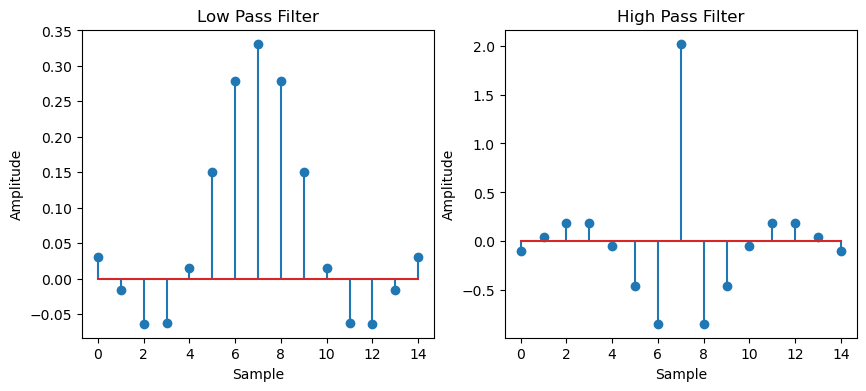

In [13]:
losinc_impres = losinc(15)
hisinc_impres = hisinc(15)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ax[0].stem(losinc_impres)
ax[0].set_title('Low Pass Filter')
ax[1].stem(hisinc_impres)
ax[1].set_title('High Pass Filter')

for i in range(len(ax)):
    ax[i].set_xlabel('Sample')
    ax[i].set_ylabel('Amplitude')

## Applying Filters

Generate a noisy 5Hz square wave

Text(0, 0.5, 'Amplitude')

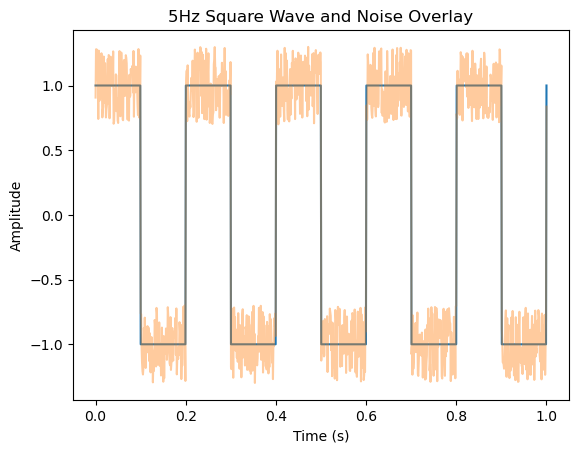

In [14]:
t = np.linspace(0, 1, 1000)
sqwave = signal.square(2*np.pi*5*t)
plt.plot(t,sqwave)

# add noise
noisysqwave = [0]*len(sqwave)
for i in range(len(sqwave)):
    noisysqwave[i] = sqwave[i]+np.random.uniform(-0.3,0.3)
plt.plot(t,noisysqwave, alpha = 0.4)

plt.title('5Hz Square Wave and Noise Overlay')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

### Applying low pass square filter (moving average)

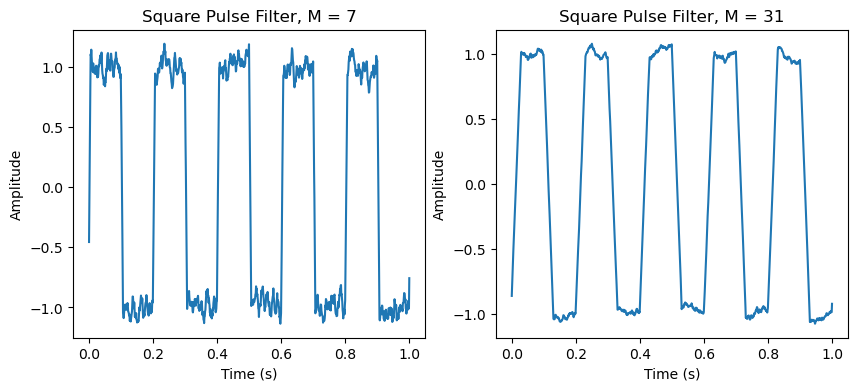

In [15]:
shortfiltIR = loMA(7)
shortfilt = myconv(noisysqwave, shortfiltIR)
longfiltIR = loMA(31)
longfilt = myconv(noisysqwave, longfiltIR)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ax[0].plot(t, shortfilt)
ax[0].set_title('Square Pulse Filter, M = 7')
ax[1].plot(t, longfilt)
ax[1].set_title('Square Pulse Filter, M = 31')

for i in range(len(ax)):
    ax[i].set_xlabel('Time (s)')
    ax[i].set_ylabel('Amplitude')

With the shorter filter width, the waves remain relatively square, but more of the high frequency noise is retained. With the longer filter width, the waves start to become triangular, but more noise is filtered out.

### Applying low pass Exponential and Sinc filters

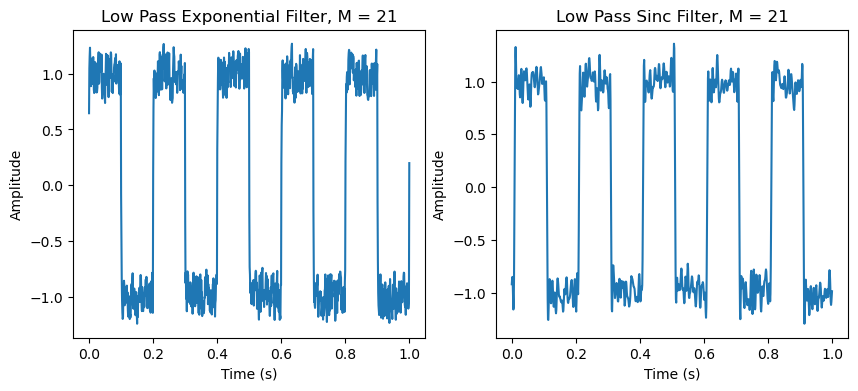

In [16]:
loexpfiltIR = loexp(21)
loexpfilt = myconv(noisysqwave, loexpfiltIR) # exp filter
losincfiltIR = losinc(21)
losincfilt = myconv(noisysqwave, losincfiltIR) # sinc filter

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ax[0].plot(t, loexpfilt)
ax[0].set_title('Low Pass Exponential Filter, M = 21')
ax[1].plot(t, losincfilt)
ax[1].set_title('Low Pass Sinc Filter, M = 21')

for i in range(len(ax)):
    ax[i].set_xlabel('Time (s)')
    ax[i].set_ylabel('Amplitude')

The exponential filter uniformly reduces the amplitude of the high frequency noise and seems to maintain an average peak/trough magnitude of 1, while the horizontal density of the peaks looks the same.
The sinc filter reduced the noise more, but also seems to have a stronger effect on the original signal's value, as seen from the irregular trends between each peak/trough.

### Applying high pass filters

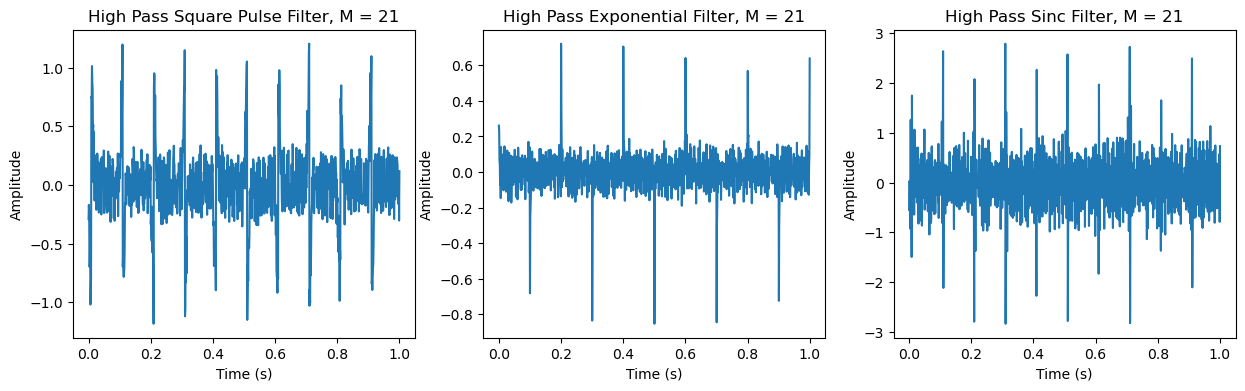

In [17]:
hiMAfiltIR = hiMA(21)
hiMAfilt = myconv(noisysqwave, hiMAfiltIR) # square pulse
hiexpfiltIR = hiexp(21)
hiexpfilt = myconv(noisysqwave, hiexpfiltIR) # exp filter
hisincfiltIR = hisinc(21)
hisincfilt = myconv(noisysqwave, hisincfiltIR) # sinc filter

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,4))
ax[0].plot(t, hiMAfilt)
ax[0].set_title('High Pass Square Pulse Filter, M = 21')
ax[1].plot(t, hiexpfilt)
ax[1].set_title('High Pass Exponential Filter, M = 21')
ax[2].plot(t, hisincfilt)
ax[2].set_title('High Pass Sinc Filter, M = 21')

for i in range(len(ax)):
    ax[i].set_xlabel('Time (s)')
    ax[i].set_ylabel('Amplitude')


The square pulse filter does a decent job at filtering out the low frequency noise, although there are vertically symmetrical 5Hz peaks from the sharp jumps between positive and negative values on the original signal.
The same issue occurs with the sinc filter, which has the same issue but does a little better job at retaining the original amplitude range of the high frequency component.
The exponential function is much better at removing the effects of the long jumps from positive to negative values in the signal, but also filters out somf of the high frequency components' signal strength.

### Applying low pass square pulse filter successively

Text(0.5, 1.0, 'Fourth Filtering')

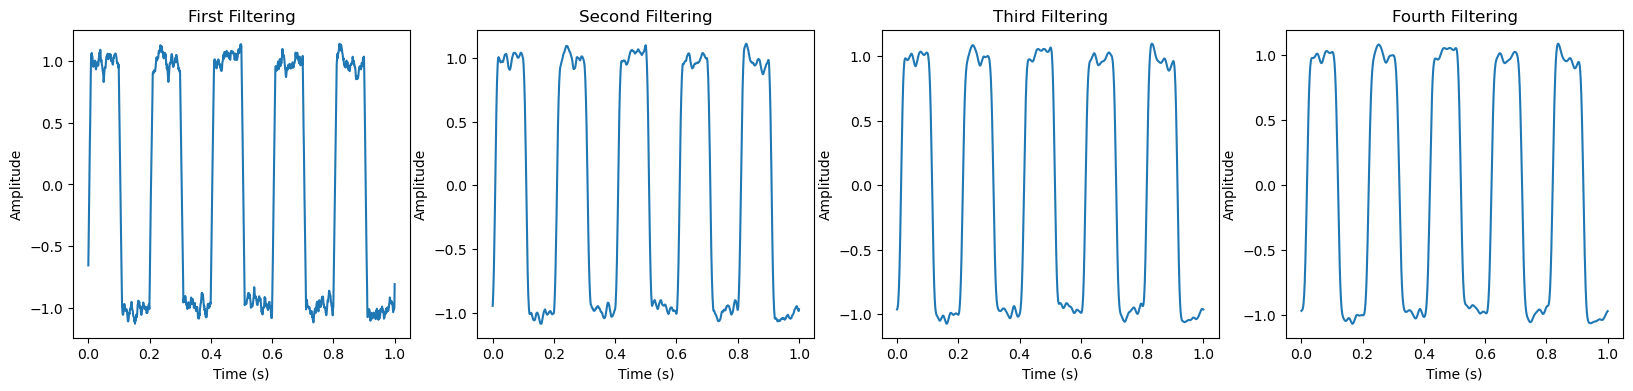

In [18]:
MAfiltx4 = noisysqwave
i = 0
MAfiltIR = loMA(11)
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20,4))

for i in range(4):
    MAfiltx4 = myconv(MAfiltx4, MAfiltIR)
    ax[i].plot(t, MAfiltx4)
    ax[i].set_xlabel('Time (s)')
    ax[i].set_ylabel('Amplitude')

ax[0].set_title('First Filtering')
ax[1].set_title('Second Filtering')
ax[2].set_title('Third Filtering')
ax[3].set_title('Fourth Filtering')

Applying a short length filter multiple times has the advantage of reducing the by high frequency noise by quite a bit without introducing too much of a triangular shape to the waves.
However, the trends in the noise are retained, and even slightly amplified, like in the third peak (near 0.5s) where the signal has a clear slope.

# Making Music

In [19]:
import IPython
from scipy.io import wavfile

## Generate waveforms of 1 octave

### B

Text(0.5, 1.0, 'B')

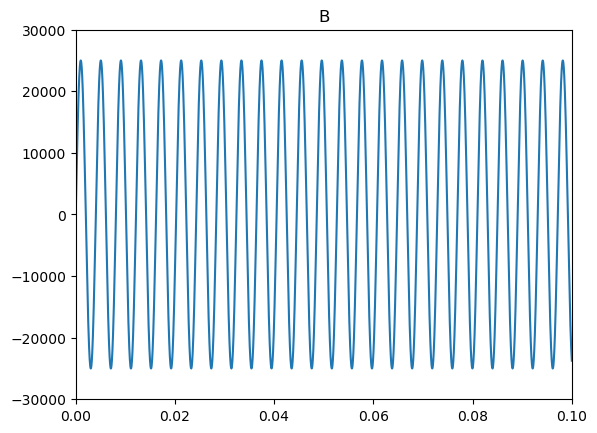

In [20]:
Amp=25000 # Amplitude of the sin wave
freq=246.94 # frequency of the sin wave in Hz
T=1/freq

fana=48000
Tana=1/fana # horizontal spacing of the points that "fake" a continuous signal

t=np.arange(0,1.5,Tana) # horizontal coordinate of your sin curve
B=Amp*np.sin(2*np.pi*freq*t) # vertical value of your sin curve

plt.axis([0,0.1,-30000,30000]) # we’re not plotting all cycles so we can see what’s going on
plt.plot(t,B, label = 'B')
plt.title('B')

In [21]:
genB = np.asarray(B, dtype=np.int16)
wavfile.write('B note.wav',fana,genB)

In [22]:
IPython.display.Audio("B note.wav")

### C

Text(0.5, 1.0, 'C')

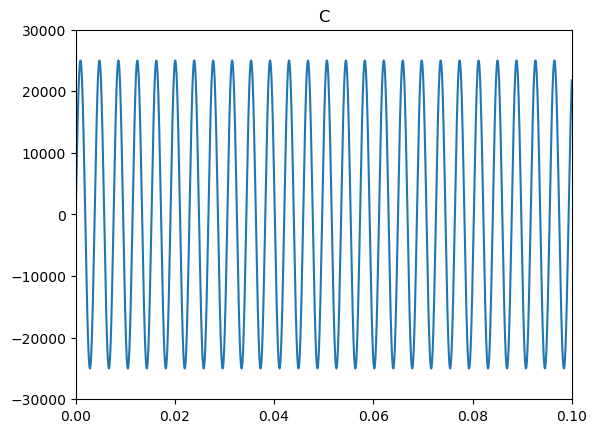

In [23]:
Amp=25000 # Amplitude of the sin wave
freq=261.63 # frequency of the sin wave in Hz
T=1/freq

fana=48000
Tana=1/fana # horizontal spacing of the points that "fake" a continuous signal

t=np.arange(0,1.5,Tana) # horizontal coordinate of your sin curve
C=Amp*np.sin(2*np.pi*freq*t) # vertical value of your sin curve

plt.axis([0,0.1,-30000,30000]) # we’re not plotting all cycles so we can see what’s going on
plt.plot(t,C, label = 'C')
plt.title('C')

In [24]:
genC = np.asarray(C, dtype=np.int16)
wavfile.write('C note.wav',fana,genC)

In [25]:
IPython.display.Audio("C note.wav")

### D

Text(0.5, 1.0, 'D')

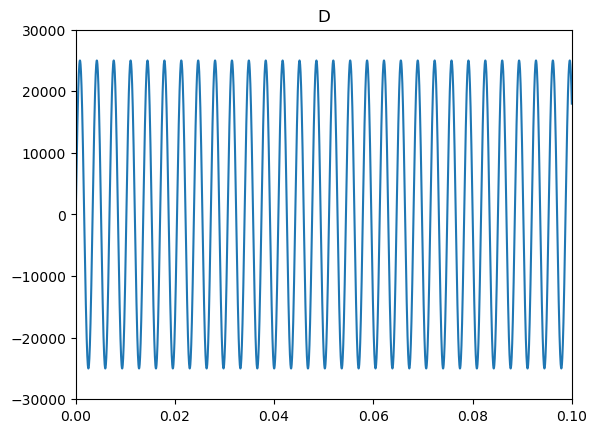

In [26]:
Amp=25000 # Amplitude of the sin wave
freq=293.66 # frequency of the sin wave in Hz
T=1/freq

fana=48000
Tana=1/fana # horizontal spacing of the points that "fake" a continuous signal

t=np.arange(0,1.5,Tana) # horizontal coordinate of your sin curve
D=Amp*np.sin(2*np.pi*freq*t) # vertical value of your sin curve

plt.axis([0,0.1,-30000,30000]) # we’re not plotting all cycles so we can see what’s going on
plt.plot(t,D, label = 'D')
plt.title('D')

In [27]:
genD = np.asarray(D, dtype=np.int16)
wavfile.write('D note.wav',fana,genD)

In [28]:
IPython.display.Audio("D note.wav")

### E

Text(0.5, 1.0, 'E')

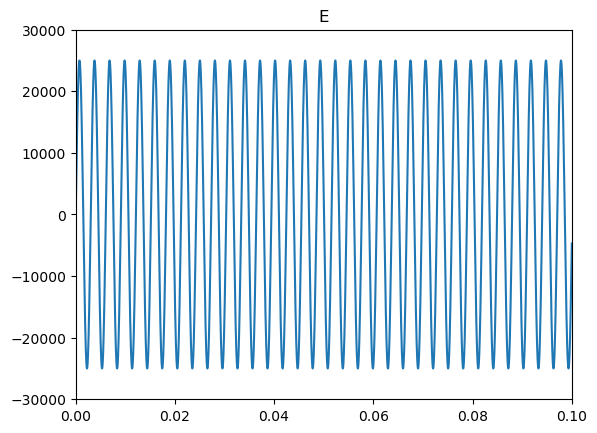

In [29]:
Amp=25000 # Amplitude of the sin wave
freq=329.63 # frequency of the sin wave in Hz
T=1/freq

fana=48000
Tana=1/fana # horizontal spacing of the points that "fake" a continuous signal

t=np.arange(0,1.5,Tana) # horizontal coordinate of your sin curve
E=Amp*np.sin(2*np.pi*freq*t) # vertical value of your sin curve

plt.axis([0,0.1,-30000,30000]) # we’re not plotting all cycles so we can see what’s going on
plt.plot(t,E, label = 'E')
plt.title('E')

In [30]:
genE = np.asarray(E, dtype=np.int16)
wavfile.write('E note.wav',fana,genE)

In [31]:
IPython.display.Audio("E note.wav")

### F

Text(0.5, 1.0, 'F')

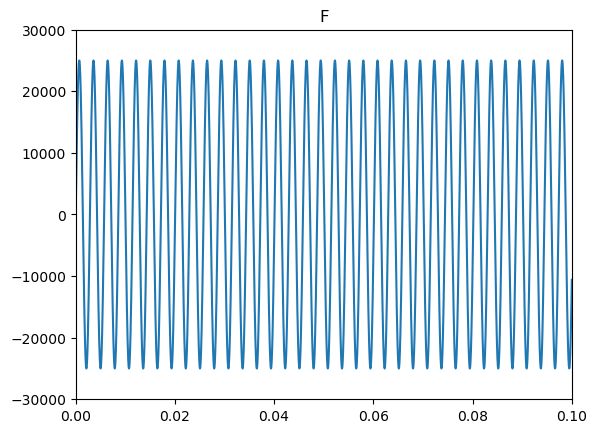

In [32]:
Amp=25000 # Amplitude of the sin wave
freq=349.23 # frequency of the sin wave in Hz
T=1/freq

fana=48000
Tana=1/fana # horizontal spacing of the points that "fake" a continuous signal

t=np.arange(0,1.5,Tana) # horizontal coordinate of your sin curve
F=Amp*np.sin(2*np.pi*freq*t) # vertical value of your sin curve

plt.axis([0,0.1,-30000,30000]) # we’re not plotting all cycles so we can see what’s going on
plt.plot(t,F, label = 'F')
plt.title('F')

In [33]:
genF = np.asarray(F, dtype=np.int16)
wavfile.write('F note.wav',fana,genF)

In [34]:
IPython.display.Audio("F note.wav")

### G

Text(0.5, 1.0, 'G')

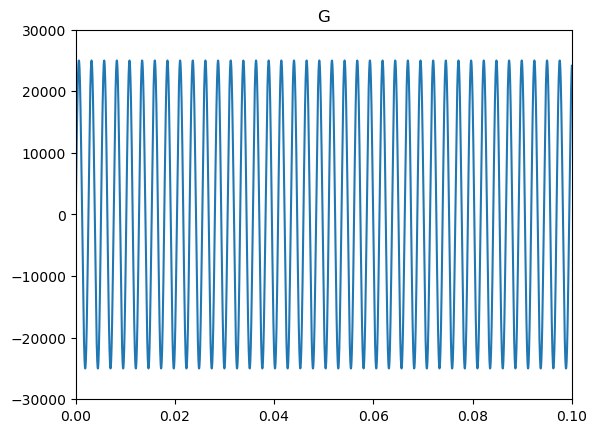

In [35]:
Amp=25000 # Amplitude of the sin wave
freq=392.00 # frequency of the sin wave in Hz
T=1/freq

fana=48000
Tana=1/fana # horizontal spacing of the points that "fake" a continuous signal

t=np.arange(0,1.5,Tana) # horizontal coordinate of your sin curve
G=Amp*np.sin(2*np.pi*freq*t) # vertical value of your sin curve

plt.axis([0,0.1,-30000,30000]) # we’re not plotting all cycles so we can see what’s going on
plt.plot(t,G, label = 'G')
plt.title('G')

In [36]:
genG = np.asarray(G, dtype=np.int16)
wavfile.write('G note.wav',fana,genG)

In [37]:
IPython.display.Audio("G note.wav")

### A

Text(0.5, 1.0, 'A')

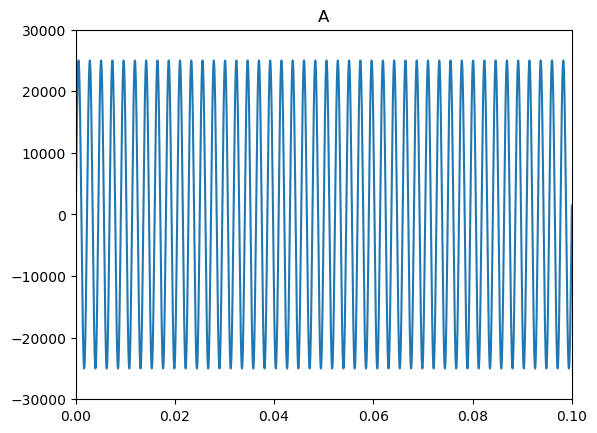

In [38]:
Amp=25000 # Amplitude of the sin wave
freq=440.00 # frequency of the sin wave in Hz
T=1/freq

fana=48000
Tana=1/fana # horizontal spacing of the points that "fake" a continuous signal

t=np.arange(0,1.5,Tana) # horizontal coordinate of your sin curve
A=Amp*np.sin(2*np.pi*freq*t) # vertical value of your sin curve

plt.axis([0,0.1,-30000,30000]) # we’re not plotting all cycles so we can see what’s going on
plt.plot(t,A, label = 'A')
plt.title('A')

In [39]:
genA = np.asarray(A, dtype=np.int16)
wavfile.write('A note.wav',fana,genA)

In [40]:
IPython.display.Audio("A note.wav")

## Chords

### CEG

In [41]:
CEG = (C+E+G)/3
genCEG = np.asarray(CEG, dtype=np.int16)
wavfile.write('CEG Chord.wav',fana,genCEG)

In [42]:
IPython.display.Audio("CEG Chord.wav")

### BDG

In [43]:
BDG = (B+D+G)/3
genBDG = np.asarray(BDG, dtype=np.int16)
wavfile.write('BDG Chord.wav',fana,genBDG)

In [44]:
IPython.display.Audio("BDG Chord.wav")

### CEA

In [45]:
CEA = (C+E+A)/3
genCEA = np.asarray(CEA, dtype=np.int16)
wavfile.write('CEA Chord.wav',fana,genCEA)

In [46]:
IPython.display.Audio("CEA Chord.wav")

### CFA

In [47]:
CFA = (C+F+A)/3
genCFA = np.asarray(CFA, dtype=np.int16)
wavfile.write('CFA Chord.wav',fana,genCFA)

In [48]:
IPython.display.Audio("CFA Chord.wav")

## Combine Chords and add noise

In [49]:
combine = np.concatenate((CEG, BDG, CEA, CFA))
combinoise = [0]*len(combine)
for i in range(len(combinoise)):
    combinoise[i] = combine[i] + np.random.normal(0,150)
    
gencombinoise = np.asarray(combinoise, dtype=np.int16)
wavfile.write('Combined Chords Noisy.wav',fana,gencombinoise)
IPython.display.Audio("Combined Chords Noisy.wav")

Figuring out filtering frequencies with FFTs

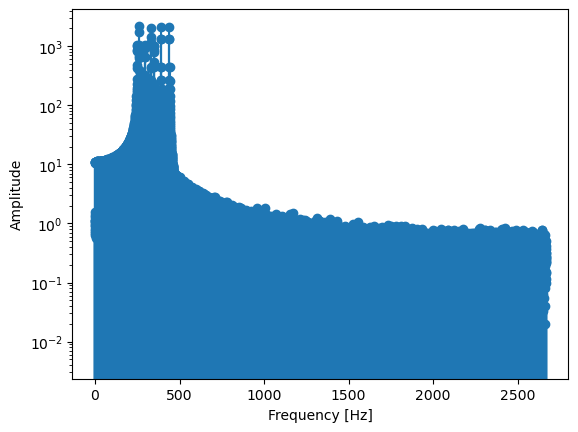

In [50]:
fftcombinoise = np.fft.fft(combinoise)
N = len(combinoise)
freqs = np.linspace(0, 48000, N)

plt.ylabel("Amplitude")
plt.yscale('log')
plt.xlabel("Frequency [Hz]")
plt.stem(freqs[:16000], np.abs(fftcombinoise[:16000])/N)
plt.show()

It seems that most of the noise is in a lower frequency than the musical frequencies (hence being able to distinguish it from tones).

I will apply a high pass moving average filter.

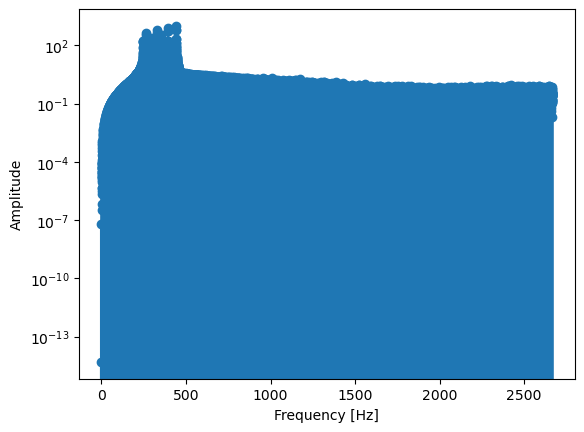

In [51]:
MAfiltIR = hiMA(65)
for i in range(4):
    combifilt1 = myconv(combinoise, MAfiltIR)

fftcombifilt1 = np.fft.fft(combifilt1)
N = len(combifilt1)
freqs = np.linspace(0, 48000, N)

plt.ylabel("Amplitude")
plt.yscale('log')
plt.xlabel("Frequency [Hz]")
plt.stem(freqs[:16000], np.abs(fftcombifilt1[:16000])/N)
plt.show()

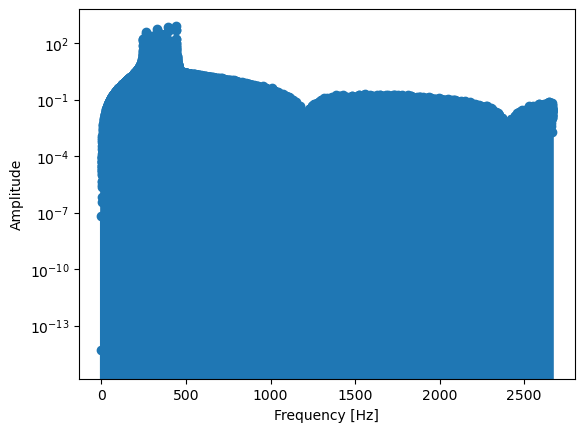

In [52]:
MAfiltIR = loMA(40)
for i in range(4):
    combifilt2 = myconv(combifilt1, MAfiltIR)


fftcombifilt2 = np.fft.fft(combifilt2)
N = len(combifilt2)
freqs = np.linspace(0, 48000, N)

plt.ylabel("Amplitude")
plt.yscale('log')
plt.xlabel("Frequency [Hz]")
plt.stem(freqs[:16000], np.abs(fftcombifilt2[:16000])/N)
plt.show()

In [53]:
gencombifilt2 = np.asarray(combifilt2, dtype=np.int16)
wavfile.write('Combined Chords Filtered.wav',fana,gencombifilt2)
IPython.display.Audio("Combined Chords Filtered.wav")

Seeing how the repeated small window-size MA filter performed better than the large window single pass, I decided to do the same thing while sandwiching the chord frequencies with low and high pass moving average filters.

The high-pass filter used a window size of 65, and the low pass filter used a window size of 40. Larger window sizes start to filter out the original signal for both filter types.

## Filtering CFA to isolate F

<StemContainer object of 3 artists>

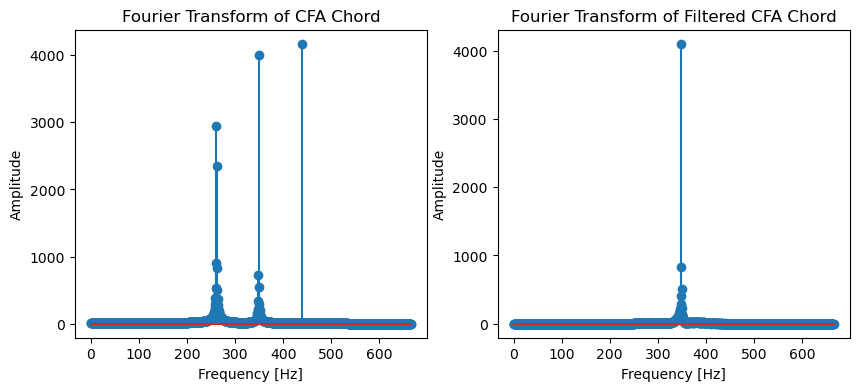

In [54]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

fftCFA = np.fft.fft(CFA)
N = len(CFA)
freqs = np.linspace(0, 48000, N)

ax[0].set_ylabel("Amplitude")
ax[0].set_xlabel("Frequency [Hz]")
ax[0].set_title('Fourier Transform of CFA Chord')
ax[0].stem(freqs[:1000], np.abs(fftCFA[:1000])/N)



b, a = signal.butter(4, [340/24000,400/24000], btype = 'bandpass')
ONLYF = signal.filtfilt(b, a, CFA)

fftONLYF = np.fft.fft(ONLYF)
N = len(ONLYF)
freqs = np.linspace(0, 48000, N) 

ax[1].set_ylabel("Amplitude")
ax[1].set_xlabel("Frequency [Hz]")
ax[1].set_title('Fourier Transform of Filtered CFA Chord')
ax[1].stem(freqs[:1000], np.abs(fftONLYF[:1000])/N)

In [55]:
genONLYF = np.asarray(ONLYF, dtype=np.int16)
wavfile.write('Filtered CFA - F.wav',fana,genONLYF)
IPython.display.Audio("Filtered CFA - F.wav")

# Correlation

In [56]:
def mycorr(list1, list2):
    '''outputs an array with values as far as list2 fits entirely in list1'''
    '''len(list1) >= len(list2)'''
    corrarr = [0]*(len(list1)) # set final array length based on longer list length
    i = 0
    j = 0
    for i in range(len(list1)+len(list2)+1):          # sweep through longer list data to store matching index data points into final array
        if (i+j)<len(list1): #only sweep as far as i+j does not exceed longer list index
            j = 0
            for j in range(len(list2)):
                corrarr[i] += list1[i+j]*list2[j]
    return corrarr

### Checking function validity

In [57]:
lst1 = np.random.randint(0, 10, size = 20)
print(lst1)
lst2 = np.random.randint(0, 10, size = 3)
print(lst2)

[6 1 2 6 8 5 5 3 6 9 2 0 4 0 5 4 4 0 2 1]
[0 6 1]


In [58]:
time_start = time.process_time()
check = np.correlate(lst1, lst2)
print(check)
time_elapsed = (time.process_time()- time_start)
print("Run time: %5.3f s" % time_elapsed)

time_start = time.process_time()
func = mycorr(lst1,lst2)
print(func)
time_elapsed = (time.process_time()- time_start)
print("Run time: %5.3f s" % time_elapsed)

[ 8 18 44 53 35 33 24 45 56 12  4 24  5 34 28 24  2 13]
Run time: 0.016 s
[8, 18, 44, 53, 35, 33, 24, 45, 56, 12, 4, 24, 5, 34, 28, 24, 2, 13, 0, 0]
Run time: 0.000 s


### Checking function performance vs np.convolve

In [59]:
lst1 = np.random.randint(0, 10, size = 10000)
print(lst1)
lst2 = np.random.randint(0, 10, size = 50)
print(lst2)

[5 0 5 ... 6 2 2]
[6 0 7 5 9 6 1 4 2 1 1 8 3 3 1 1 6 4 8 7 1 0 0 3 3 4 7 7 0 5 7 0 4 0 9 7 9
 3 5 8 6 4 8 3 4 2 4 8 2 3]


In [60]:
time_start = time.process_time()
check = np.correlate(lst1, lst2)
time_elapsed = (time.process_time()- time_start)
print("Run time: %5.3f s" % time_elapsed)

time_start = time.process_time()
func = mycorr(lst1,lst2)
time_elapsed = (time.process_time()- time_start)
print("Run time: %5.3f s" % time_elapsed)

Run time: 0.000 s
Run time: 0.078 s


## Using on xcorr data

In [61]:
xcor = np.loadtxt("xcor_data.csv", delimiter=",", usecols=(0), skiprows=(0))

### Define Correlation Data

In [62]:
t = np.linspace(-6, 6, 81)
x = np.sinc(t)

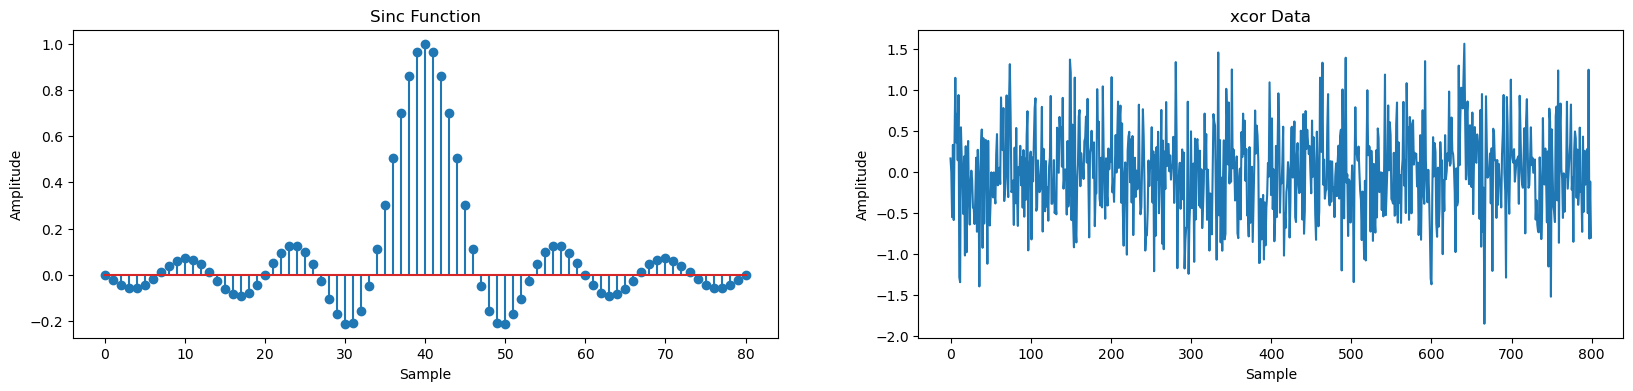

In [63]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,4))
ax[0].stem(x)
ax[0].set_title('Sinc Function')
ax[1].plot(xcor)
ax[1].set_title('xcor Data')

for i in range(len(ax)):
    ax[i].set_xlabel('Sample')
    ax[i].set_ylabel('Amplitude')

The upside down sinc function occurs at index #349 with a correlation value of -6.0766.
The right side up sinc function occurs at index #600 with a correlation value of 7.2705.


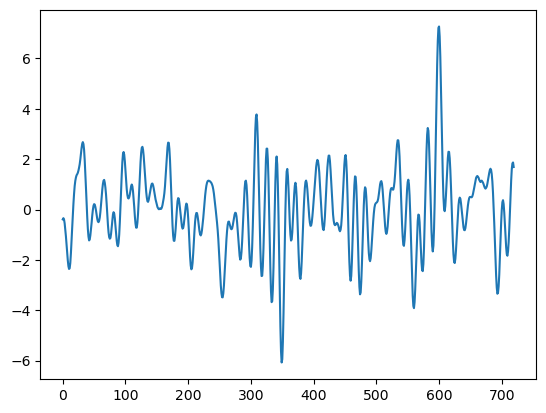

In [64]:
crosscorr = np.correlate(xcor, x)

plt.plot(crosscorr)

flipped = int(np.where(crosscorr == crosscorr.min())[0])
flippedmag = crosscorr.min()
upright = int(np.where(crosscorr == crosscorr.max())[0])
uprightmag = crosscorr.max()

print(f'The upside down sinc function occurs at index #{flipped} with a correlation value of {flippedmag:.5}.')
print(f'The right side up sinc function occurs at index #{upright} with a correlation value of {uprightmag:.5}.')